# Introduction to NumPy for Working with Numerical Data Arrays

<div class="alert alert-success">
    
## This notebook covers
- NumPy multidimensional array data structure
- NumPy data types
- Array creation
- Basic and advanced indexing
- Elementwise array calculations
- Array aggregation functions
- Broadcasting
- Views and copies
- Query functions
- Array manipulation
- Reading and writing array data
</div>

<div class="alert alert-warning">

## Reminders

Remember, you can use Jupyter's built-in table of contents (hamburger on the far left) to jump from heading to heading.

---

This notebook will run in the MSUpy conda environment, which you create in the previous lesson. To select the Jupyter kernel the MSUpy environment go to the Kernel tab, select Change Kernel, then select the MSUpy kernel in the pop up window.

---

To turn on line number for code cells go to View menu and click Show Line Numbers.

</div>

# I. Importing Necessary Packages

In [180]:
import numpy as np
import matplotlib.pyplot as plt

# II. Introduction to the NumPy Data Structure

The NumPy (**Num**erical **Py**thon) package is widely used in science and engineering for working with data in homogenous (same data type) multidimensional arrays. Using NumPy multidimensional arrays, as opposed to nested Python lists, improves speed, reduces memory consumption, and offers easier syntax for performing a variety of common data processing tasks. 

## Data Structure - ndarray

The NumPy data structure is called an *ndarray*, for n-dimensional array, which we may refer to throughout this notebook simply as an "array". Below is a schematic of a 1-d, 2-d, and 3-d array. A 1-d array looks similar to a list or a single row of data values. A 2-d array looks similar to a grid or table with rows and columns. A 3-d array looks similar to a cube or cuboid. Each dimension in an ndarray is called an *axis* and the first axis is always axis zero, keeping consistent with Python's zero-based indexing. Also, NumPy arrays must be rectangular and not jagged (i.e., each row of a two-dimensional array must have the same number of columns) and all of the data values in each array must be of the same data type. You'll notice below that similar to Pandas DataFrames, NumPy arrays have a shape attribute where each number in the shape tuple is the length of an array axis. 

<img src="images/numpy_arrays.png" alt="schematic of ndarrays" width="700"/>

It could be helpful to think of array dimensionality in terms of the data your arrays could hold (see image below). A geoscientist, for example, may use a 1-d array to hold solar radiation observations over time at a single location (a timeseries). In this case the only axis (axis 0) would represent data values at different times. A 2-d array could hold spatially gridded data like a gridded map of annual mean temperature or alternatively it could hold land surface imagery with 1-meter pixel resolution, for example. In this case axis 0 (rows) could represent data values at different latitudes and axis 1 (columns) could represent data values at different longitudes. A 3-d array could hold a timeseries of spatially gridded data like daily gridded maximum temperature. In this case axis 0 (the stack in the image below) could represent different times and axes 1 and 2 could represent different latitudes and longitudes.  

<img src="images/numpy_geoarrays.png" alt="ndarray data examples" width="700"/>

The above are examples of array data you may encounter frequently, but actually NumPy arrays can have as many axes as you can dream up and each axis can represent whatever you want it to. In this notebook though, we'll think of 1-d arrays mostly as timeseries, 2-d arrays as latitude-longitude grids, and 3-d arrays as timeseries of latitude-longitude grids. 

We won't get into higher dimensional data arrays and we'll only work with numerical data arrays (integer, float, boolean). Technically, NumPy arrays can contain numerical or non-numerical data (such as strings and bytes) but non-numerical data must be defined as fixed-width data types, which requires knowing or calculating the sizes of the longest text or byte sequence in advance. We will not cover non-numerical NumPy arrays in this course. 

## NumPy Data Types

We'll cover a few, but not all, of the NumPy numerical data types here. NumPy supports a much greater variety of numerical data types than core Python does. NumPy numerical data types are more specific than the core Python numerical data types, allowing for more efficient memory usage and faster computation. More detail can be found in the [NumPy Documentation for Data Types](https://numpy.org/doc/stable/user/basics.types.html#data-types).

The NumPy data types below are *concrete* types, meaning that a consistent number of bits are reserved for each individual data value in memory. A bit is the smallest unit of data in a computer (represented by a 0 or a 1) and you need 8 bits (1 byte) to represent one character like a letter or number in memory. The concrete data types below are named by combining the basic numerical type name (e.g., integer, float) with the number of bits that are needed to represent a single value in memory (bitsize).

NumPy Data Type | Description | Value Range
---|---|---
np.bool_ | 8-bit Boolean | True/False, not equivalent to 1,0
np.int8 | 8-bit integer value | -128 to 127
np.int16 | 16-bit integer value | -32768 to 32767
np.int32 | 32-bit integer value | -2147483648 to 2147483647
np.int64 | 64-bit integer value | -9223372036854775808 to 9223372036854775807
np.uint8 | unsigned 8-bit integer value | 0 to 255
np.uint16 | unsigned 16-bit integer value | 0 to 65535
np.uint32 | unsigned 32-bit integer value | 0 to 4294967295
np.uint64 | unsigned 64-bit integer value | 0 to 18446744073709551615
np.float16 | half precision float values | Precision: 3 decimal digits<br /> Range: ±6.55040e4 
np.float32 | single-precision float values | Precision: 6 decimal digits<br /> Range: ±3.4028235e+38, 
np.float64 | double-precision float values | Precision: 15 decimal digits<br /> Range: ±1.7976931348623157e+308 

<div class="alert alert-danger">

**Sidebar: Pay attention to your data types**

When you start working with larger array objects, you will need to be more aware of how much memory your objects are consuming to avoid running into the RAM limitations of your computer. 

For example, if you obtain daily gridded temperature or precipitation data they are often provided as float64. This is a wildly unneccesary amount of precision for these data. You can certainly covert to float32 which would result in speedier calculations and use only half the memory as float64. For temperature, you can convert to float16 for even faster calculations and 1/4 of the memory use as float64. For precipitation or other data that may require more than 3 decimal places or contain values greater than ~65500 the smallest/fastest data type may be float32.

If you try converting your data to a smaller data type and receive an "overflow" warning, that means 1 or more of your data values cannot be properly represented with fewer bits. We'll cover an example of this later.
</div>

Although not necessary recommended, NumPy arrays can also hold data of built-in Python types. The NumPy aliases to the built-in Python data types for boolean, integer, and float are:

Python Built-in Type | NumPy Alias | Description
---|---|---
bool | np.bool | boolean True/False, equivalent to 1,0
int | np.int | integer values of variable size in memory
float | np.float | float values of variable size in memory


## Creating a NumPy Array from Scratch

We'll first create 1-D, 2-D, and 3-D NumPy arrays and later we'll learn how to read data from file into NumPy arrays. 

First, a 1-D array. Create it using the ```numpy.array()``` function and give the function a Python list of numbers as the input parameter.

In [2]:
arr_1d = np.array([1,2,3,4,5,6,7,8,9,10])

print(arr_1d.shape)
arr_1d

(10,)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

This should be fairly straightforward. Notice that, like Pandas offers the ```.shape``` attribute for its data structure (the dataframe), NumPy offers the ```.shape``` attribute as well for its data structure (the ndarray). 

Why the trailing comma in the shape tuple?

It's just part of the Python language. The ```.shape``` attribute always returns a tuple and the trailing comma indicates that it is a single-element tuple (you can't have a single-element tuple without the trailing comma). There is only 1 dimension (i.e., axis) in our array so our shape tuple will only have 1 element.

Now, we'll create a 2-D array by giving the ```numpy.array()``` function a nested Python list of numbers as the input parameter.

In [3]:
arr_2d = np.array([[1,2,3,4,5],
                   [6,7,8,9,10]])

print(arr_2d.shape)
arr_2d

(2, 5)


array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

The result is an array with 2 rows and 5 columns of data values. 

The length (5) of the innermost nested list that you provide to ```numpy.array()``` (e.g., ```[1, 2, 3, 4, 5]``` and ```[6, 7, 8, 9, 10]```) is the last (rightmost) axis in the array shape. It's often helpful to think of the last axis of your arrays with 2 or more axes as your columns.

The number of innermost lists (2) is the next axis to the left (second to last axis). It's often helpful to think of the second to last axis of your arrays with 2 or more axes as your rows.

Let's try a 3-D array.

In [15]:
arr_3d = np.array([[[1, 2], 
                    [4,3], 
                    [7,4]],
                   [[2, 8], 
                    [9, 10], 
                    [7, 5]],
                   [[1, 6], 
                    [3, 11], 
                    [0, 2]]])

print(arr_3d.shape)
arr_3d

(3, 3, 2)


array([[[ 1,  2],
        [ 4,  3],
        [ 7,  4]],

       [[ 2,  8],
        [ 9, 10],
        [ 7,  5]],

       [[ 1,  6],
        [ 3, 11],
        [ 0,  2]]])

Again, the length (2) of the innermost nested list that you provide to ```numpy.array()``` is the last axis in the array shape (axis 2). The number of innermost lists (3) inside the next nest level is the second to last axis (axis 1). The number of 3x2 nested lists (3) inside the next nest level is the next dimension to the left (axis 0). It's often helpful to think of 3-D arrays as stack, rows, columns.

If we think about this array as having dimensions time, latitude, longitude then this array would contain a 3x2 gridded map of data (3 latitudes by 2 longitudes) at 3 different times. Where longitudes are your columns (last axis), latitudes are your rows (next to last axis), and time is the stack (leftmost axis) of your 3-D data "cube".

Let's visualize this array in three dimensions. Look at where the ```[1, 2]``` appears. The ```[1, 2]``` represents the data values at the first time, the first latitude, and all (2) longitudes. 

<img src="images/numpy3D_selection.png" alt="ndarray data examples" width="300"/>

## Array Attributes

Each ndarray has a number of *attributes*. We've already seen one of these above with ```.shape```. The others we will cover are ```.ndim```, ```.size```, ```.dtype```, ```.itemsize```, and ```.nbytes```. The full list of attributes can be found in the [NumPy API reference for numpy.ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html).

In [19]:
print(arr_3d.shape)
print(arr_3d.ndim)
print(arr_3d.size)

(3, 3, 2)
3
18


```.shape``` returns a tuple with the number of elements along each dimension.

```.ndim``` returns the number of dimensions.

```.size``` returns the total number of elements in the array. In this case, 3 * 3 * 2 = 18.

In [20]:
print(arr_3d.dtype)
print(arr_3d.itemsize)
print(arr_3d.nbytes)

int32
4
72


```.dtype``` returns the data type.

```.itemsize``` returns the bytes consumed by one single element in the array. Remember, NumPy arrays are homogenous, so each element of an array will consume the same number of bytes.

```.nbytes``` returns the total bytes consumed by the array. This will be the number of elements in the array (```.size```) times the size in bytes of one element (```.itemsize```). (You can also infer the size of one element in bytes from your data type, e.g., int64 means one element takes up 64 bits of memory which is equivalent to 64 / 8 = 8 bytes)

**What is the data type of your ```arr_3D```?** Since we didn't specify a data type when we created ```arr_3D```, NumPy will recognize that the input is integer and the default integer data type that is assigned to the array will be based on the computer where you are running this notebook. If your computer has a 64-bit operating system, the default integer data type will be int64. If your computer has a 32-bit operating system, the default integer data type will be int32. This applies to float data as well. Today, most operating systems are 64-bit, so your ```.dtype``` output above probably says int64 and your ```.nbytes``` output probably says 144. If it doesn't, then your operating system is not 64-bit and that's ok too.  

**Using less memory:** If you are always working with small data, then having all your data stored with 64 bits per data value (likely the default on your computer) is fine, but consuming that much memory per array element is likely overkill unless your data contains super large or super small numbers. It's a good idea to get into the habit of including a data type when you create your NumPy arrays. This way you can reduce how much memory your data consumes and your code will run faster. 

Let's recreate our 1-D and 2-D arrays using data types that consume less memory.

In [17]:
# include the dtype parameter to store data using less memory
arr_1d = np.array([1,2,3,4,5,6,7,8,9,10], dtype='int8')

arr_2d = np.array([[1,2,3,4,5],
                   [6,7,8,9,10]], dtype='int16')

print(f'arr_1d dtype is {arr_1d.dtype}, arr_2d dtype is {arr_2d.dtype}')

arr_1d dtype is int8, arr_2d dtype is int16


You can also convert the data type after you've created an array with the ndarray function ```.astype()```.

In [18]:
# convert dtype of existing array
arr_3d = arr_3d.astype('int32')
arr_3d.dtype

dtype('int32')

The choice of which data type to convert each array to in this example is arbitrary. All our example arrays contain only small positive integers that will fit into the smallest integer data types (int8 or uint8).

<div class="alert alert-info"> 

## Exercise 1: Create a NumPy Array from Scratch and Access Its Attributes

Create a 2-dimensional 32-bit integer array called ```myArr2d``` with 4 rows and 3 columns.
</div>

In [118]:
# add your code here
myArr2d = np.array([[1,2,3],
                    [4,5,6],
                    [7,8,9],
                    [10,11,12]],
                   dtype='int32')

<div class="alert alert-info"> 

Programatically show the following attributes of ```myArr2d```:
- its shape
- how many total data values there are
- its data type
- the total number of bytes it consumes
</div>

In [119]:
# add your code here
print(myArr2d.shape)
print(myArr2d.size)
print(myArr2d.dtype)
print(myArr2d.nbytes)

(4, 3)
12
int32
48


# III. Indexing and Slicing Data

Indexing and slicing are ways to select data values in your arrays. NumPy offers multiple ways you can index arrays: *basic indexing* and *advanced indexing*, which we will cover, and field access, which we will not cover. 

## Basic Indexing and Slicing

Basic indexing allows you to index and slice NumPy arrays in a way very similar to how you can index and slice Python lists. You will notice the similar syntax and the exclusive slice end index. Basic indexing and slicing result in a view into an existing array, rather than a new array. We'll demonstrate what this means shortly.

### Single Cell

To select a single cell of an array you need to provide an index value for each array axis separated by a comma.

In [123]:
# single cell basic indexing of 1d array
# 1d array, 1 index value
print(arr_1d)
print(arr_1d[0])  # first element
print(arr_1d[-1]) # last element

[ 1  2  3  4  5  6  7  8  9 10]
1
10


In [121]:
# single cell basic indexing of 2d array
# 2d array, 2 index values
print(arr_2d)
print(arr_2d[1,0])

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
6


In [122]:
# single cell basic indexing of 3d array
# 3d array, 3 index values
print(arr_3d)
print(arr_3d[1,2,1])

[[[ 1  2]
  [ 4  3]
  [ 7  4]]

 [[ 2  8]
  [ 9 10]
  [ 7  5]]

 [[ 1  6]
  [ 3 11]
  [ 0  2]]]
5


You may not need this very often, but you can also use a tuple for indexing.

In [94]:
# select a single value with a tuple
arr_2d[(1,0)] # second row, first column

np.int16(6)

### Slice of 1 Row

A single colon is used as the index value if you want all of the values along a particular dimension.

In [61]:
# select the second row (all columns)
print(arr_2d)
print('--------------------')
print(arr_2d[1,:])

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
--------------------
[ 6  7  8  9 10]


In [62]:
# select the first time, first latitude, all longitudes
print(arr_3d)
print('--------------------')
print(arr_3d[0,0,:])

[[[ 1  2]
  [ 4  3]
  [ 7  4]]

 [[ 2  8]
  [ 9 10]
  [ 7  5]]

 [[ 1  6]
  [ 3 11]
  [ 0  2]]]
--------------------
[1 2]


### Slice of 1 Column

In [63]:
print(arr_2d)
print('--------------------')
arr_2d[:,0]

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
--------------------


array([1, 6], dtype=int16)

### Slice Along a Single Dimension

Providing a start and end index on each side of a colon works to select multiple indexes, exclusive of the end index.

In [64]:
# all rows, slice of columns
print(arr_2d)
print('--------------------')
arr_2d[:,1:3]

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
--------------------


array([[2, 3],
       [7, 8]], dtype=int16)

### Slice Along Multiple Dimensions

Selecting the second and third time, first and second latitude, first longitude of ```arr_3d```


<img src="images/numpy3D_multipledims.png" alt="schematic of what to select" width="300"/>

In [66]:
# second and third time, first and second latitude, first longitude
arr_3d[1:,0:2,0]

array([[2, 9],
       [1, 3]], dtype=int32)

### Slicing with a Stride

To include a stride in a slice you can use the syntax ```start:end:stride```. In this example we take a slice of columns that includes every other column from index 0 to index 2:

In [134]:
# all rows, slice of columns
print(arr_2d)
print('--------------------')
arr_2d[:,0:3:2]

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
--------------------


array([[1, 3],
       [6, 8]], dtype=int16)

An alternative syntax that includes a stride is ```start::stride```. This assumes you want to go all the way to the end of the sliced dimension.

In [135]:
arr_2d[:,1::2]

array([[2, 4],
       [7, 9]], dtype=int16)

Lastly, if you want to stride along an entire dimension you don't really need to include a start or end index at all. You can use the syntax ```::stride```.

In [137]:
arr_2d[:,::2]

array([[ 1,  3,  5],
       [ 6,  8, 10]], dtype=int16)

### Indexing with Elipses

Elipses are short hand for all values in one or more dimensions. So ```arr_3d[0,...]``` is the same as ```arr_3d[0,:,:]```.

In [105]:
# all latitudes and longitudes at time index 0
arr_3d[0,...]

array([[1, 2],
       [4, 3],
       [7, 4]], dtype=int32)

### Indexing with Less Dimensions Than Present

What happens if you provide indexing for less dimensions than are present in your array? NumPy will assume that the indexing you provide corresponds to leftmost axis and that you want all of the dimensions you haven't indexed.

In [115]:
# using 1 index for a 2-dimensional array
arr_2d[1]

array([ 6,  7,  8,  9, 10], dtype=int16)

In the example above you can see that if we only use a single index for a 2-dimensional array, NumPy will use that index value on axis 0 and give us all of the other dimension. In this case, ```arr_2d``` of index 1 means get the second row, all columns of the array.

In other words, all of the following index syntax will return the same result:

```arr_2d[1]```,   ```arr_2d[1,:]```,   ```arr_2d[1,...]```

Now, let's look at what happens with our 3d array.

In [116]:
arr_3d[0]

array([[1, 2],
       [4, 3],
       [7, 4]], dtype=int32)

For a 3-dimensional array if there is a single index provided, NumPy assumes that index corresponds to the leftmost axis (axis 0), which in this case is our time axis. 

In other words, all of the following index syntax will return the same result:

```arr_3d[0]```,   ```arr_3d[0,:,:]```,   ```arr_3d[0,...]```

If we provide a second index for the 3-dimensional array, NumPy assumes the second index corresponds to the next leftmost axis. So two indexes given to a 3d array would correspond to axis 0 and axis 1. 

In [117]:
arr_3d[0,1]

array([4, 3], dtype=int32)

In other words, all of the following index syntax will return the same result:

```arr_3d[0,1]```,   ```arr_3d[0,1,:]```,   ```arr_3d[0,1,...]```

### Basic Indexing Results in a View

As mentioned earlier, basic indexing and slicing results in a view into your existing array, not a copy of your array. Here's what that means:

In [203]:
# creating a view into arr_1d with basic indexing
new_arr = arr_1d[0:3]

print(new_arr)
print(arr_1d)

[1 2 3]
[ 1  2  3  4  5  6  7  8  9 10]


```arr_1d``` is our original data array and ```new_arr``` is a view into ```arr_1d```. This means if we change a value in ```new_arr```, that same value will change in ```arr_1d``` as well.

In [204]:
# changing a value in the view means
# changing the value in the original array
new_arr[1]=10
arr_1d

array([ 1, 10,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int8)

You might not have expected that! We'll cover how to make a copy instead of a view later in the notebook.

<div class="alert alert-info"> 

### Exercise 2: Basic Indexing and Slicing

In your ```arr_3d``` make the following selections using indexing and slicing. Note that slicing is never jagged so your data selection for part (d) will include two data values that you cannot see in the image.

<table><tr>
<td> <img src="images/numpy3D_selection1.png" alt="schematic of what to select" width="300"/> </td>
<td> <img src="images/numpy3D_selection2.png" alt="schematic of what to select" width="300"/> </td>
<td> <img src="images/numpy3D_selection3.png" alt="schematic of what to select" width="300"/> </td>
<td> <img src="images/numpy3D_selection4.png" alt="schematic of what to select" width="300"/> </td>
</tr></table

</div>



<div class="alert alert-info"> 

**part (a)**
</div>


In [205]:
# add your code here
arr_3d[1,1,0]

np.int32(9)

<div class="alert alert-info"> 

**part (b)**
</div>

In [207]:
# add your code here
arr_3d[0:2,1,0] 

array([4, 9], dtype=int32)

<div class="alert alert-info"> 

**part (c)**
</div>

In [208]:
# add your code here
arr_3d[1:,1:,0]

array([[9, 7],
       [3, 0]], dtype=int32)

<div class="alert alert-info"> 

**part (d)**
</div>

In [209]:
# add your code here
arr_3d[:,1:,:]

array([[[ 4,  3],
        [ 7,  4]],

       [[ 9, 10],
        [ 7,  5]],

       [[ 3, 11],
        [ 0,  2]]], dtype=int32)

## Advanced Indexing with Integer Arrays

NumPy arrays offer indexing capability beyond what is possible with nested Python lists. We can index any NumPy array with another NumPy array of integers. Using advanced indexing results in the creation of a new array (as opposed to a view).

### Single- and Multi-Dimensional Examples

First, an example with our 1-dimensional array ```arr_1d```.

In [210]:
# reminder of what is in arr_1d
print(arr_1d)

# create an array of indexes
indexes = np.array([0,2,4,6])

# use the array to select data from arr_1d
arr_1d[indexes]

[ 1 10  3  4  5  6  7  8  9 10]


array([1, 3, 5, 7], dtype=int8)

You can do the same thing using a list of index values instead of an array with the following syntax, but note that it's recommended to use arrays as opposed to lists for indexing bigger data. Your code will run faster and be more memory efficient with arrays.

In [51]:
# indexing with a list
arr_1d[[0,2,4,6]]

array([1, 3, 5, 7], dtype=int8)

An example with our 2-dimensional array ```arr_2d```

In [211]:
# reminder of what is in arr_2d
print(arr_2d)

# selecting the data values 2,4,6,8
# create an array of indexes for each dimension
row_index = np.array([0,0,1,1])
col_index = np.array([1,3,0,2])

# use the arrays to select data from arr_2d
arr_2d[row_index,col_index]

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


array([2, 4, 6, 8], dtype=int16)

And the equivalent using lists:

In [52]:
# indexing with lists
arr_2d[[0,0,1,1],[1,3,0,2]]

array([2, 4, 6, 8], dtype=int16)

### With a Tuple

You can also do advanced indexing with a tuple. Here's how to save your index arrays as a tuple and use it for multi-dimensional indexing.

In [88]:
# multi-dimensional indexing with a tuple of arrays
tup_indexes = (row_index,col_index)  # 2,4,6,8 as we did above
arr_2d[tup_indexes]

array([2, 4, 6, 8], dtype=int16)

### Advanced Indexing Results in a New Array

We'll create ```new_arr``` again from the first three numbers in ```arr_1d```, but this time we'll use advanced indexing to do it.

In [213]:
# reminder of what is in arr_1d
print(arr_1d)

# create an array of indexes
indexes = np.array([0,1,2])

# select data from arr_1d
new_arr = arr_1d[indexes]
print(new_arr)

[ 1 10  3  4  5  6  7  8  9 10]
[ 1 10  3]


```new_arr``` is not a view in this case, it is a whole new array stored in a separate place in memory. So, if we change a value in ```new_arr```, ```arr_1d``` will not be affected.

In [214]:
# make change to new_arr
new_arr[1]=2

# there will be no change to arr_1d
arr_1d

array([ 1, 10,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int8)

In [194]:
test=np.array([[1,0,1],[0,1,0]])
result = arr_2d[test]
print(result.shape)
result

(2, 3, 5)


array([[[ 6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]],

       [[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5]]], dtype=int16)

### With Less Dimensions Than Present

What happens if you provide array indexing for less dimensions than are present in your array? As we saw earlier, NumPy will assume that your array index corresponds to the leftmost axis and that you want all of the dimensions you haven't indexed.

For example, let's take our 2-dimensional array and give it only the row_index values (```row_index = np.array([0,0,1,1])```).

In [112]:
# our 2-dimensional array
print(arr_2d)

# providing array indexing for less dimensions than are present in arr_2d
arr_2d[row_index]

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


array([[ 1,  2,  3,  4,  5],
       [ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [ 6,  7,  8,  9, 10]], dtype=int16)

You can see that NumPy returns two of the first row (all columns) and two of the second row (all columns) of data values. You might not expect this to happen, so just be careful and double check yourself as you write your code.

All of the following syntax, as we saw earlier in the notebook, will return the same result:

```arr_2d[row_index]```,   ```arr_2d[row_index,:]```,   ```arr_2d[row_index,...]```

### With a Multi-dimensional Array

What if we index a 2-dimensional array with another 2-dimensional array?

In [202]:
index_2d = np.array([[1,0,1],
                     [0,1,0]])

result = arr_2d[index_2d]

print(index_2d.shape)
print(result.shape)
result

(2, 3)
(2, 3, 5)


array([[[ 6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]],

       [[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5]]], dtype=int16)

```arr_2d``` has two dimensions but we only provided one indexing array. We've seen what happens when we provide less indexing arrays than there are dimensions. NumPy will use all the values in ```index_2d``` as indexes for the first dimension (the rows or axis 0) of ```arr_2d```. The result is returned as a 3-dimensional array with shape ```(2, 3, 5)```, which is a bit confusing. The easiest way to think about this is that the first two dimensions of the result come from the dimensions of the ```index_2d``` array and the third dimension of the result comes from ```arr_2d```. 

For a more in depth explanation of what is going on, focus on what we are asking for from ```arr_2d``` with our index array ```index_2d```. The first row of ```index_2d``` is ```[1,0,1]```. This means, get the second row of ```arr_2d```, then get the first row of ```arr_2d```, then get the second row of ```arr_2d```. So, we asked for 3 rows of ```arr_2d``` and each row has 5 data values (columns). That's where the 3 (rows) and the 5 (columns) come from in the shape ```(2, 3, 5)```. The 2 (stack) in the shape ```(2, 3, 5)``` comes from the fact that with ```index_2d``` ```[0,1,0]```we asked for 3 more rows and 5 more columns from ```arr_2d```.  



### An Application of Advanced Indexing

Let's pretend we have landcover data in a 2-dimensional array. The classes represent:

- 0 = open water
- 1 = grassland
- 2 = shrubland
- 3 = deciduous forest
- 4 = evergreen forest
- 5 = bare soil
- 6 = herbaceous wetland

In [189]:
lc_class = np.array([[1,1,1,1,6,0,1,2,2,2],
                    [1,1,1,6,0,0,1,2,2,2],
                    [1,1,1,0,0,0,0,1,2,2],
                    [1,1,1,1,0,0,0,1,2,2],
                    [3,1,1,1,6,0,0,1,2,2],
                    [3,3,1,1,1,1,1,1,1,2],
                    [3,3,3,3,2,2,2,1,2,2],
                    [4,4,3,3,3,2,2,1,1,1],
                    [4,4,4,3,3,2,2,1,1,1],
                    [5,4,4,3,2,2,2,1,1,1]],
                    dtype='int8')
lc_class.shape

(10, 10)

We can plot the landcover data with matplotlib ```imshow``` using the default color map called viridis.

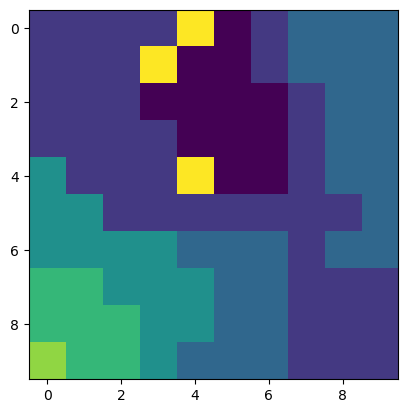

In [190]:
# plot landcover data with default color map

plt.imshow(lc_class)

Notice the values on the y axis correspond to the indexes of the array rows (axis 0) and the values on the x axis correspond to the indexes of the array columns (axis 1). 

This plot is fine, but what if we wanted to plot the data using colors that make more sense for each landcover class? We can use advanced indexing for that.

First, we create an array containing an rgb color for each landcover class.

In [191]:
# store rgb colors for each of the classes in a 2-d array

rgb_palette = np.array([[70, 107, 159],   # 0 = open water
                        [223, 223, 194],  # 1 = grassland
                        [204, 184, 121],  # 2 = shrubland
                        [104, 171, 95],   # 3 = deciduous forest
                        [28, 95, 44],     # 4 = evergreen forest
                        [179, 172, 159],  # 5 = barren land
                        [108, 159, 184]]) # 6 = herbaceous wetlands 
rgb_palette.shape

(7, 3)

If we provide a single index to the 2-dimensional ```rgb_palette``` we get the rgb triplet. Notice that the index we provide also matches the landcover class for that rgb color. (i.e., index zero holds the blue color for landcover class 0)

In [192]:
# a single index value returns the rgb triplet
rgb_palette[0]

array([ 70, 107, 159])

If we use the entire ```lc_class``` array to index the rgb_palette, we will get the rgb triplet for each data value in lc_class.

Let's look at the shape of what is returned.

In [183]:
rgb_palette[lc_class].shape

(10, 10, 3)

Remember as we saw earlier, the first two dimensions come from the indexing array which in this case is ```lc_class```. The third dimension comes from the array being indexed which is ```rgb_palette```. It's a bit confusing to think of this shape as stack, rows, columns. We know the first two dimensions come from the landcover data so in this case it's useful to think of this shape as rows, columns, stack. Where the rows and columns match the shape of the landcover data and each level of the stack contains a component of the rgb color. So, ```rgb_palette[lc_class]``` is storing a 10 x 10 map of rgb triplets.

Matplotlib ```imshow``` expects 2-dimensional imagery. So if you give ```imshow``` data with a third dimension, it automatically assumes that the third dimension is an rgb color. Therefore, we can use ```imshow``` to plot our landcover rgb triplets (```rgb_palette[lc_class]```) very easily. 

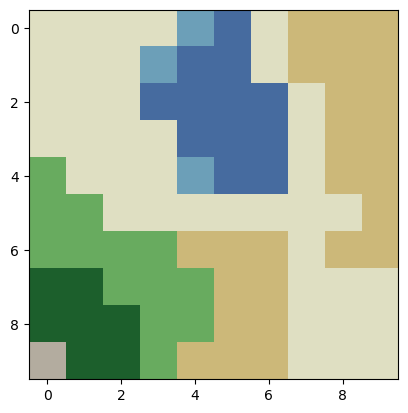

In [184]:
plt.imshow(rgb_palette[lc_class])

We'll cover much more about creating different types of figures in another lesson. But for now, let's do one more cool thing with our figure. We'll add the land cover class to each pixel. To accomplish this we have to loop through all the ```lc_class``` data values and create a text object for each data value to plot over the image. 

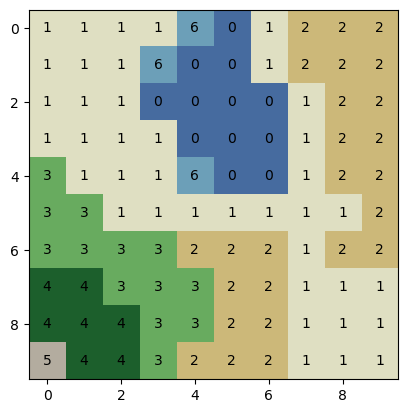

In [215]:
# add the landcover class to each pixel

plt.imshow(rgb_palette[lc_class])

for i in range(0, lc_class.shape[0]):
    for j in range(0, lc_class.shape[1]):
        plt.text(j, i, str(lc_class[i,j]), va='center', ha='center')

## Advanced Indexing with Boolean Arrays

You could also use a boolean array as an indexer for advanced indexing instead of an integer array. Usually, you would generate a boolean array using a conditional statement and then use the boolean array to select data values that satisfy the condition(s).

Let's take a look. First, we'll write a conditional statement on a NumPy array. The condition is evaluated on each data value in the array separately, therefore, the conditional statement returns a boolean array of the same shape.

In [224]:
# print for reference
print(arr_2d)

# conditional returns boolean array
arr_2d > 5

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


array([[False, False, False, False, False],
       [ True,  True,  True,  True,  True]])

If we wanted to select only the values greater than 5 from ```arr_2d``` we can use the boolean array returned from a conditional statement as the indexing array. This is advanced indexing and  will return a brand new array, not a view. You can either put the conditional statement directly inside the square brackets:

In [223]:
arr_2d[arr_2d > 5]

array([ 6,  7,  8,  9, 10], dtype=int16)

Or, you could assign the result of your conditional statement to a separate variable. Then, index with that variable:

In [225]:
index_arr = arr_2d > 5
arr_2d[index_arr]

array([ 6,  7,  8,  9, 10], dtype=int16)

<div class="alert alert-info"> 

## Exercise 3: Advanced Indexing

Using advanced indexing, select the diagonal values (1,7,13,19,25) of the array ```arr```.
</div>

In [216]:
arr = np.array([[1,2,3,4,5],
               [6,7,8,9,10],
               [11,12,13,14,15],
               [16,17,18,19,20],
               [21,22,23,24,25]])

# add your code here
indexes = np.array([0,1,2,3,4])
arr[indexes,indexes]

array([ 1,  7, 13, 19, 25])

<div class="alert alert-info"> 

Now, select the same diagonal values using all negative indexes.
</div>

In [217]:
# add your code here
indexes = np.array([-5,-4,-3,-2,-1])
arr[indexes,indexes]

array([ 1,  7, 13, 19, 25])

<div class="alert alert-info"> 
    
Last, use a conditional statement to generate a boolean array that will select only the even numbers from ```arr```.
</div>

In [228]:
# add your code here
arr[arr % 2 == 0]

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24])

# IV. Math Operations

We'll create two NumPy arrays and 2 Python lists to illustrate concepts in this section

In [241]:
# two 1d arrays of length 5
data1 = np.array([1,2,3,4,5], dtype = 'int8')
data2 = np.array([.1,.2,.3,.4,.5], dtype = 'float32')

# two lists of length 5 with the same data values
list1 = [1,2,3,4,5]
list2 = [.1,.2,.3,.4,.5]

## Elementwise Operations

Basic operations on NumPy arrays like ```+```, ```-```, ```*```, ```/```, ```**```, ```%```, ```//```, and ```np.sqrt()``` operate elementwise meaning the calculation is applied separately to each element in the array. 

In [230]:
# basic operations are elementwise
data1+1

array([2, 3, 4, 5, 6])

See how each element of the array was incremented by 1. Try this same thing with a Python list.

In [231]:
list1+1

TypeError: can only concatenate list (not "int") to list

Whoops! Lists just don't work that way. If you remember the Python Language Basics lesson, to increment a list we'd have to write a for loop or a list comprehension.

In [232]:
# list comprehension to increment elements in a list by 1
[x+1 for x in list1]

[2, 3, 4, 5, 6]

You should immediately see how much simpler it is to work with numerical data stored in NumPy arrays vs Python lists! 

If our data arrays are the same shape, we can also easily perform elementwise operations using both arrays. 

In [233]:
data1 / data2

array([10., 10., 10., 10., 10.])

Notice what happened here. The first element of ```data1``` was divided by the first element of ```data2``` (1 / 0.1), the second element of ```data1``` was divided by the second element of ```data2``` (2 / 0.2), and so on.

What happens if we try this on our lists?

In [234]:
list1 / list2

TypeError: unsupported operand type(s) for /: 'list' and 'list'

Whoops! Again, lists just don't work that way. We would need a for loop or a list comprehension.

In [236]:
[x/y for x,y in zip(list1,list2)]

[10.0, 10.0, 10.0, 10.0, 10.0]

Wow! That is so unnecessarily complicated for a simple calculation. Hopefully, you are starting to see the beauty and power of NumPy now. 

Technically, NumPy is applying a loop behind the scenes for you. And the reason NumPy can provide speed improvements over comparible Python code is that NumPy is heavily based in C and C++ code, which executes much faster than Python.  So, behind the scenes NumPy is executing the loop required for ```data1 / data2``` ultra fast in C! And you don't need to know how to code in C at all to reap the benefits.

Let's take a quick look at what happened with our data types for the calculations we just did.

In [247]:
print('data1 dtype is',data1.dtype, 'and data2 dtype is',data2.dtype)

var_add = data1 + data2
var_div = data1 / data2

print('var_add dtype is',var_add.dtype)
print('var_div dtype is',var_div.dtype)

data1 dtype is int8 and data2 dtype is float32
var_add dtype is float32
var_div dtype is float32


This is called *upcasting*. When operating with arrays of different types the type of the resulting array corresponds to the larger-memory type. 

The int8 data type of elements in ```data1``` consume 8 bits or 1 byte, but the float32 elements in ```data2``` consume 32 bits or 4 bytes. When we do an operation that involves both ```data1``` and ```data2``` the result will be upcast to the larger-memory type, which is float32. 

All of what we just covered applies to NumPy arrays of any dimension. Basic operations on 2D, 3D, 4D, etc. arrays will be elementwise and when operating with arrays of different data types the resulting data type is upcasted.

## Aggregation and Summary Functions

NumPy offers all the usual aggregation and summary functions for arrays.
- .sum(),
- .mean(),
- .median(),
- .quantile()
- .min(),
- .max(),
- .var()
- .std()

As well as some extras (this list is not exhaustive):
- .ptp()
- .percentile()
- np.unique()

# V. Broadcasting

# VI. Views and Copies

# VII. Query

#np.unique, all, any, where, nonzero, fill

# VIII. Array Creation Functions

#np.zeros, ones, empty, arange, linspace, random.default_rng, rng.integers


# IX. Array Manipulation

##reshape, newaxis, expand_dims, vstack, hstack, hsplit, transpose, flatten,  concatenate, np.sort


# X. Input/Output

#formats numpy can handle

#npy format, save and load
    #use temperature data for the example, show all different files with metadata 

#loadtxt, savetxt

#using pandas to read into numpy array and write to csv

<div class="alert alert-info"> 

# XI. Exercise: Putting it All Together
</div>

# XII. At a Glance: Language Covered

The NumPy functionality that we covered at a glance...

## NumPy Functions

## NumPy data structure (ndarray) methods

## NumPy data structure (ndarray) attributes

<div class="alert alert-success">

# XIII. Learning More About Pandas

For more about Pandas, start on the Pandas website where you can find:

- a nice cheat sheet https://pandas.pydata.org/docs/getting_started/index.html
- a long list of community developed tutorials https://pandas.pydata.org/docs/getting_started/tutorials.html#communitytutorials
- the user guide, which contains a bunch of 10 minute learning guides as well as more in-depth guides by topic https://pandas.pydata.org/docs/user_guide/index.html
</div>